In [6]:
# Import necessary libraries
import pandas as pd

# Define the column names manually
column_names = ['Alternate', 'Bar', 'Fri/Sat', 'Hungry', 'Patrons', 'Price','Raining', 'Reservation', 'Type', 'WaitEstimate', 'Wait']

# Load the dataset without a header
data = pd.read_csv('restaurant.csv', header=None, names=column_names)

# Print the first few rows of the dataset to ensure it's loaded correctly
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  Alternate  Bar Fri/Sat Hungry Patrons Price Raining Reservation     Type  \
0       Yes   No      No    Yes     NaN   $$$      No         Yes   French   
1        No  Yes     Yes    Yes    Some     $      No          No     Thai   
2       Yes   No      No     No    Full    $$     Yes         Yes   Burger   
3       Yes   No     Yes    Yes    Full   $$$      No          No  Italian   
4        No  Yes      No     No    Some     $     Yes         Yes   Burger   

  WaitEstimate Wait  
0         0-10   No  
1        10-30  Yes  
2        30-60  Yes  
3          >60   No  
4        10-30  Yes  


In [18]:
# Split the data into features (X) and target (y)
X = data.drop('Wait', axis=1)
y = data['Wait']
# print(y)
# Convert categorical variables to numerical using get_dummies
X = pd.get_dummies(X)
print(X)


    Alternate_No  Alternate_Yes  Bar_No  Bar_Yes  Fri/Sat_No  Fri/Sat_Yes  \
0          False           True    True    False        True        False   
1           True          False   False     True       False         True   
2          False           True    True    False        True        False   
3          False           True    True    False       False         True   
4           True          False   False     True        True        False   
5          False           True    True    False        True        False   
6          False           True    True    False       False         True   
7           True          False   False     True        True        False   
8          False           True   False     True       False         True   
9          False           True   False     True       False         True   
10          True          False    True    False        True        False   
11         False           True    True    False       False         True   

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the test set results
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



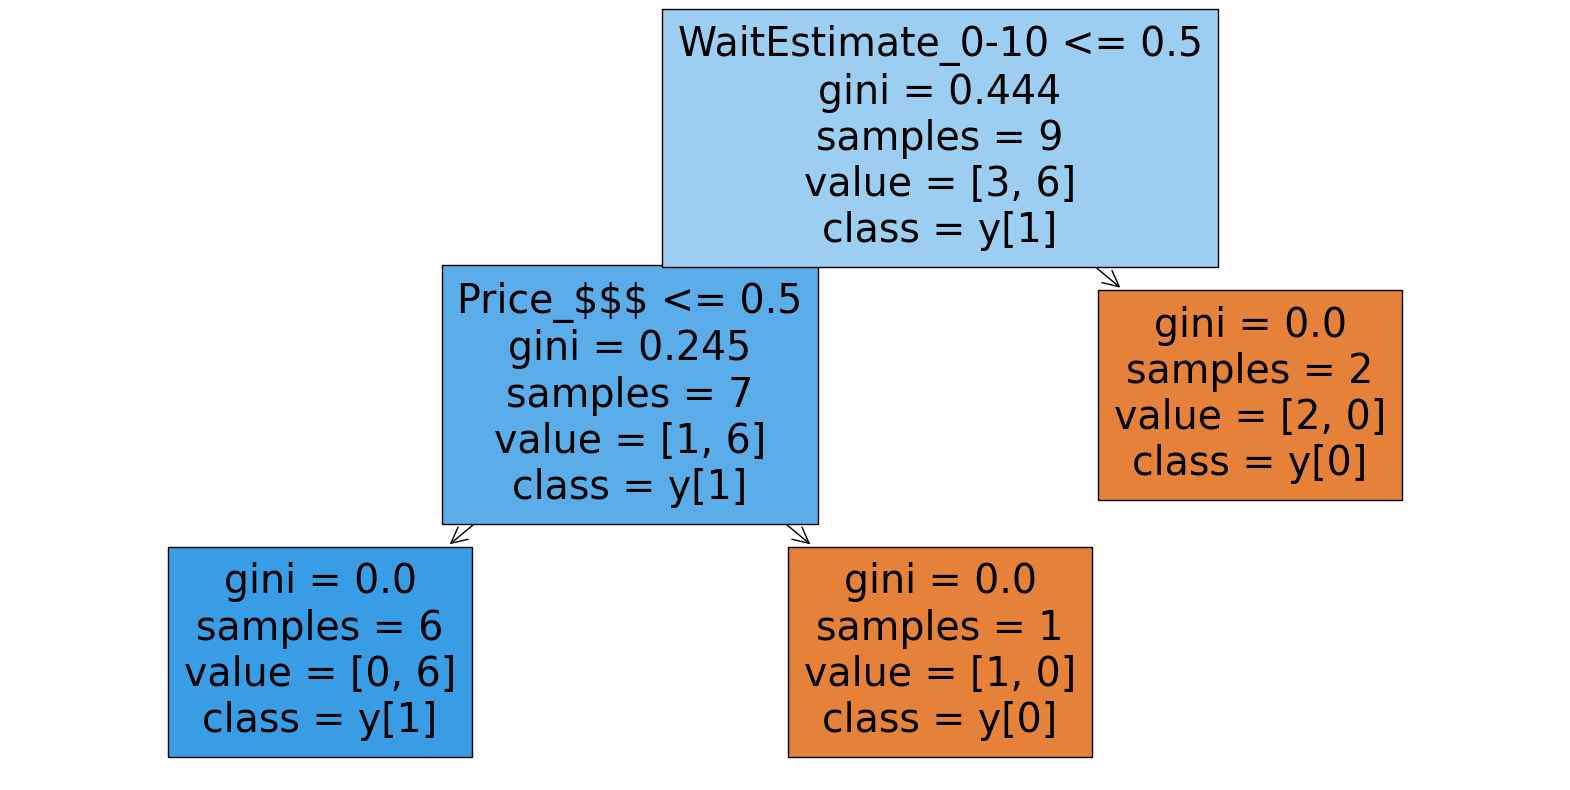

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()



Index(['Alternate_Nodollars', 'Alternate_Yesdollars', 'Bar_Nodollars',
       'Bar_Yesdollars', 'FriSat_Nodollars', 'FriSat_Yesdollars',
       'Hungry_Nodollars', 'Hungry_Yesdollars', 'Patrons_Fulldollars',
       'Patrons_Somedollars', 'Price_dollars', 'Price_dollars',
       'Price_dollars', 'Raining_Nodollars', 'Raining_Yesdollars',
       'Reservation_Nodollars', 'Reservation_Yesdollars', 'Type_Burgerdollars',
       'Type_Frenchdollars', 'Type_Italiandollars', 'Type_Thaidollars',
       'WaitEstimate_010dollars', 'WaitEstimate_1030dollars',
       'WaitEstimate_3060dollars', 'WaitEstimate_60dollars'],
      dtype='object')


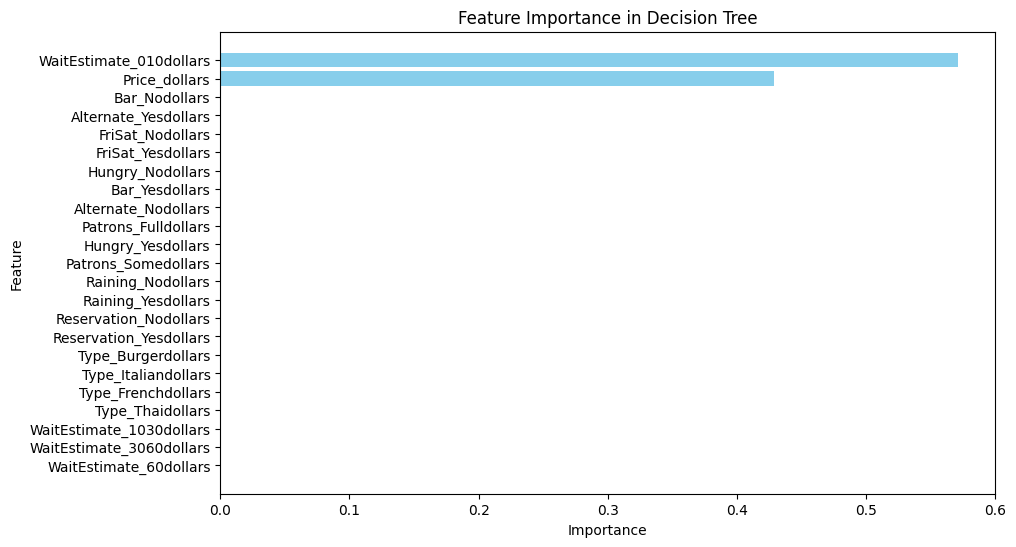

In [34]:
# Get the feature importances
feature_importances = clf.feature_importances_
# Replace special characters in column names
# Remove special characters from column names
# Remove special characters and replace them with underscores
X.columns = X.columns.str.replace(r'[^A-Za-z0-9_]', '', regex=True)

# Print the new column names to verify the changes
print(X.columns)



# Proceed with training and visualization as usual

# Create a DataFrame for better visualization of feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()
